In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan=pd.read_csv('loan.prediction.csv')
loan

,Loan.ID,Gender,Married,Dependents,Education,Self.Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan.Amount.Term,Credit.History,Property.Area,Loan.Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# Data Exploation

In [14]:
loan.shape

(614, 13)

In [15]:
loan.head()

,Loan.ID,Gender,Married,Dependents,Education,Self.Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan.Amount.Term,Credit.History,Property.Area,Loan.Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan.ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self.Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan.Amount.Term     600 non-null float64
Credit.History       564 non-null float64
Property.Area        614 non-null object
Loan.Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [17]:
loan.dtypes

Loan.ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self.Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan.Amount.Term     float64
Credit.History       float64
Property.Area         object
Loan.Status           object
dtype: object

In [18]:
loan.columns

Index(['Loan.ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self.Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan.Amount.Term', 'Credit.History', 'Property.Area', 'Loan.Status'],
      dtype='object')

In [21]:
#checking null value
loan.isnull().sum()

Loan.ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self.Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan.Amount.Term     14
Credit.History       50
Property.Area         0
Loan.Status           0
dtype: int64

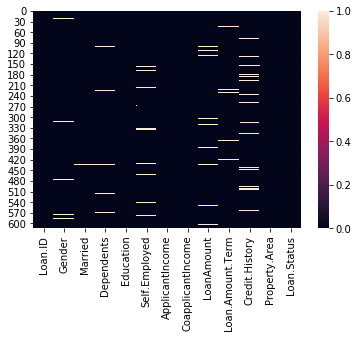

In [23]:
sns.heatmap(loan.isnull())

In [3]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
loan['Gender']=imp.fit_transform(loan['Gender'].values.reshape(-1,1))
loan['Married']=imp.fit_transform(loan['Married'].values.reshape(-1,1))
loan['Gender']=imp.fit_transform(loan['Gender'].values.reshape(-1,1))
loan['Self.Employed']=imp.fit_transform(loan['Self.Employed'].values.reshape(-1,1))
loan['Self.Employed']=imp.fit_transform(loan['Self.Employed'].values.reshape(-1,1))
loan['Dependents']=imp.fit_transform(loan['Dependents'].values.reshape(-1,1))

In [4]:
from sklearn.preprocessing import Imputer
imp=SimpleImputer(strategy='mean')
loan['LoanAmount']=imp.fit_transform(loan['LoanAmount'].values.reshape(-1,1))
loan['Loan.Amount.Term']=imp.fit_transform(loan['Loan.Amount.Term'].values.reshape(-1,1))
loan['Credit.History']=imp.fit_transform(loan['Credit.History'].values.reshape(-1,1))

In [6]:
loan.isnull().sum()

Loan.ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self.Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan.Amount.Term     0
Credit.History       0
Property.Area        0
Loan.Status          0
dtype: int64

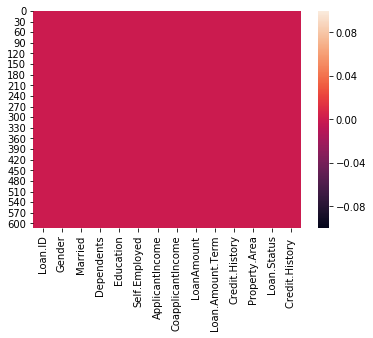

In [34]:
sns.heatmap(loan.isnull())

In [35]:
#check the missing data treatment
loan.head()

,Loan.ID,Gender,Married,Dependents,Education,Self.Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan.Amount.Term,Credit.History,Property.Area,Loan.Status,Credit.History
0,0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1.0
1,1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1.0
2,2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1.0
3,3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1.0
4,4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1.0


In [5]:
#changing categorical value to numerical value
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [6]:
for col in loan.columns:
    loan[col]=le.fit_transform(loan[col])
loan.head()

,Loan.ID,Gender,Married,Dependents,Education,Self.Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan.Amount.Term,Credit.History,Property.Area,Loan.Status
0,0,1,0,0,0,0,376,0,100,9,2,2,1
1,1,1,1,1,0,0,306,60,81,9,2,0,0
2,2,1,1,0,0,1,139,0,26,9,2,2,1
3,3,1,1,0,1,0,90,160,73,9,2,2,1
4,4,1,0,0,0,0,381,0,94,9,2,2,1


In [38]:
loan.corr()

,Loan.ID,Gender,Married,Dependents,Education,Self.Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan.Amount.Term,Credit.History,Property.Area,Loan.Status,Credit.History
Loan.ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.008771,-0.030368,0.033688,-0.024801,-0.034663,-0.155416,0.011773,-0.034663
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.074223,0.180774,0.151163,-0.069368,0.019882,-0.025752,0.017987,0.019882
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.010497,0.207905,0.184857,-0.087657,-0.005177,0.004257,0.091478,-0.005177
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.137382,-0.065140,0.161153,-0.094810,-0.029681,-0.000244,0.010118,-0.029681
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.190873,-0.052724,-0.172249,-0.088487,-0.083070,-0.065243,-0.085884,-0.083070
Self.Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.199142,-0.036033,0.117717,-0.031174,-0.003643,-0.030860,-0.003700,-0.003643
ApplicantIncome,0.008771,0.074223,0.010497,0.137382,-0.190873,0.199142,1.000000,-0.248763,0.525324,-0.016402,0.048375,-0.065143,-0.003123,0.048375
CoapplicantIncome,-0.030368,0.180774,0.207905,-0.065140,-0.052724,-0.036033,-0.248763,1.000000,0.264136,-0.020010,-0.036084,-0.082223,0.007812,-0.036084
LoanAmount,0.033688,0.151163,0.184857,0.161153,-0.172249,0.117717,0.525324,0.264136,1.000000,0.065580,-0.014301,-0.084076,-0.049717,-0.014301
Loan.Amount.Term,-0.024801,-0.069368,-0.087657,-0.094810,-0.088487,-0.031174,-0.016402,-0.020010,0.065580,1.000000,0.023971,-0.091598,0.002512,0.023971


In [40]:
loan.describe()

,Loan.ID,Gender,Married,Dependents,Education,Self.Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan.Amount.Term,Credit.History,Property.Area,Loan.Status,Credit.History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,247.117264,78.884365,87.719870,8.526059,1.628664,1.037459,0.687296,1.628664
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,143.537853,92.623999,45.670174,1.404423,0.724018,0.787482,0.463973,0.724018
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,120.250000,0.000000,53.250000,9.000000,2.000000,0.000000,0.000000,2.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,244.500000,33.500000,82.000000,9.000000,2.000000,1.000000,1.000000,2.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,369.750000,153.750000,116.750000,9.000000,2.000000,2.000000,1.000000,2.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,504.000000,286.000000,203.000000,10.000000,2.000000,2.000000,1.000000,2.000000


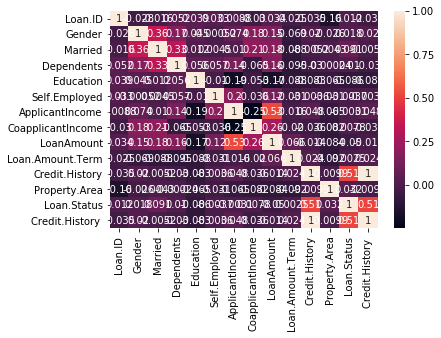

In [44]:
#correlation heatmap
sns.heatmap(loan.corr(),annot=True)
plt.show()

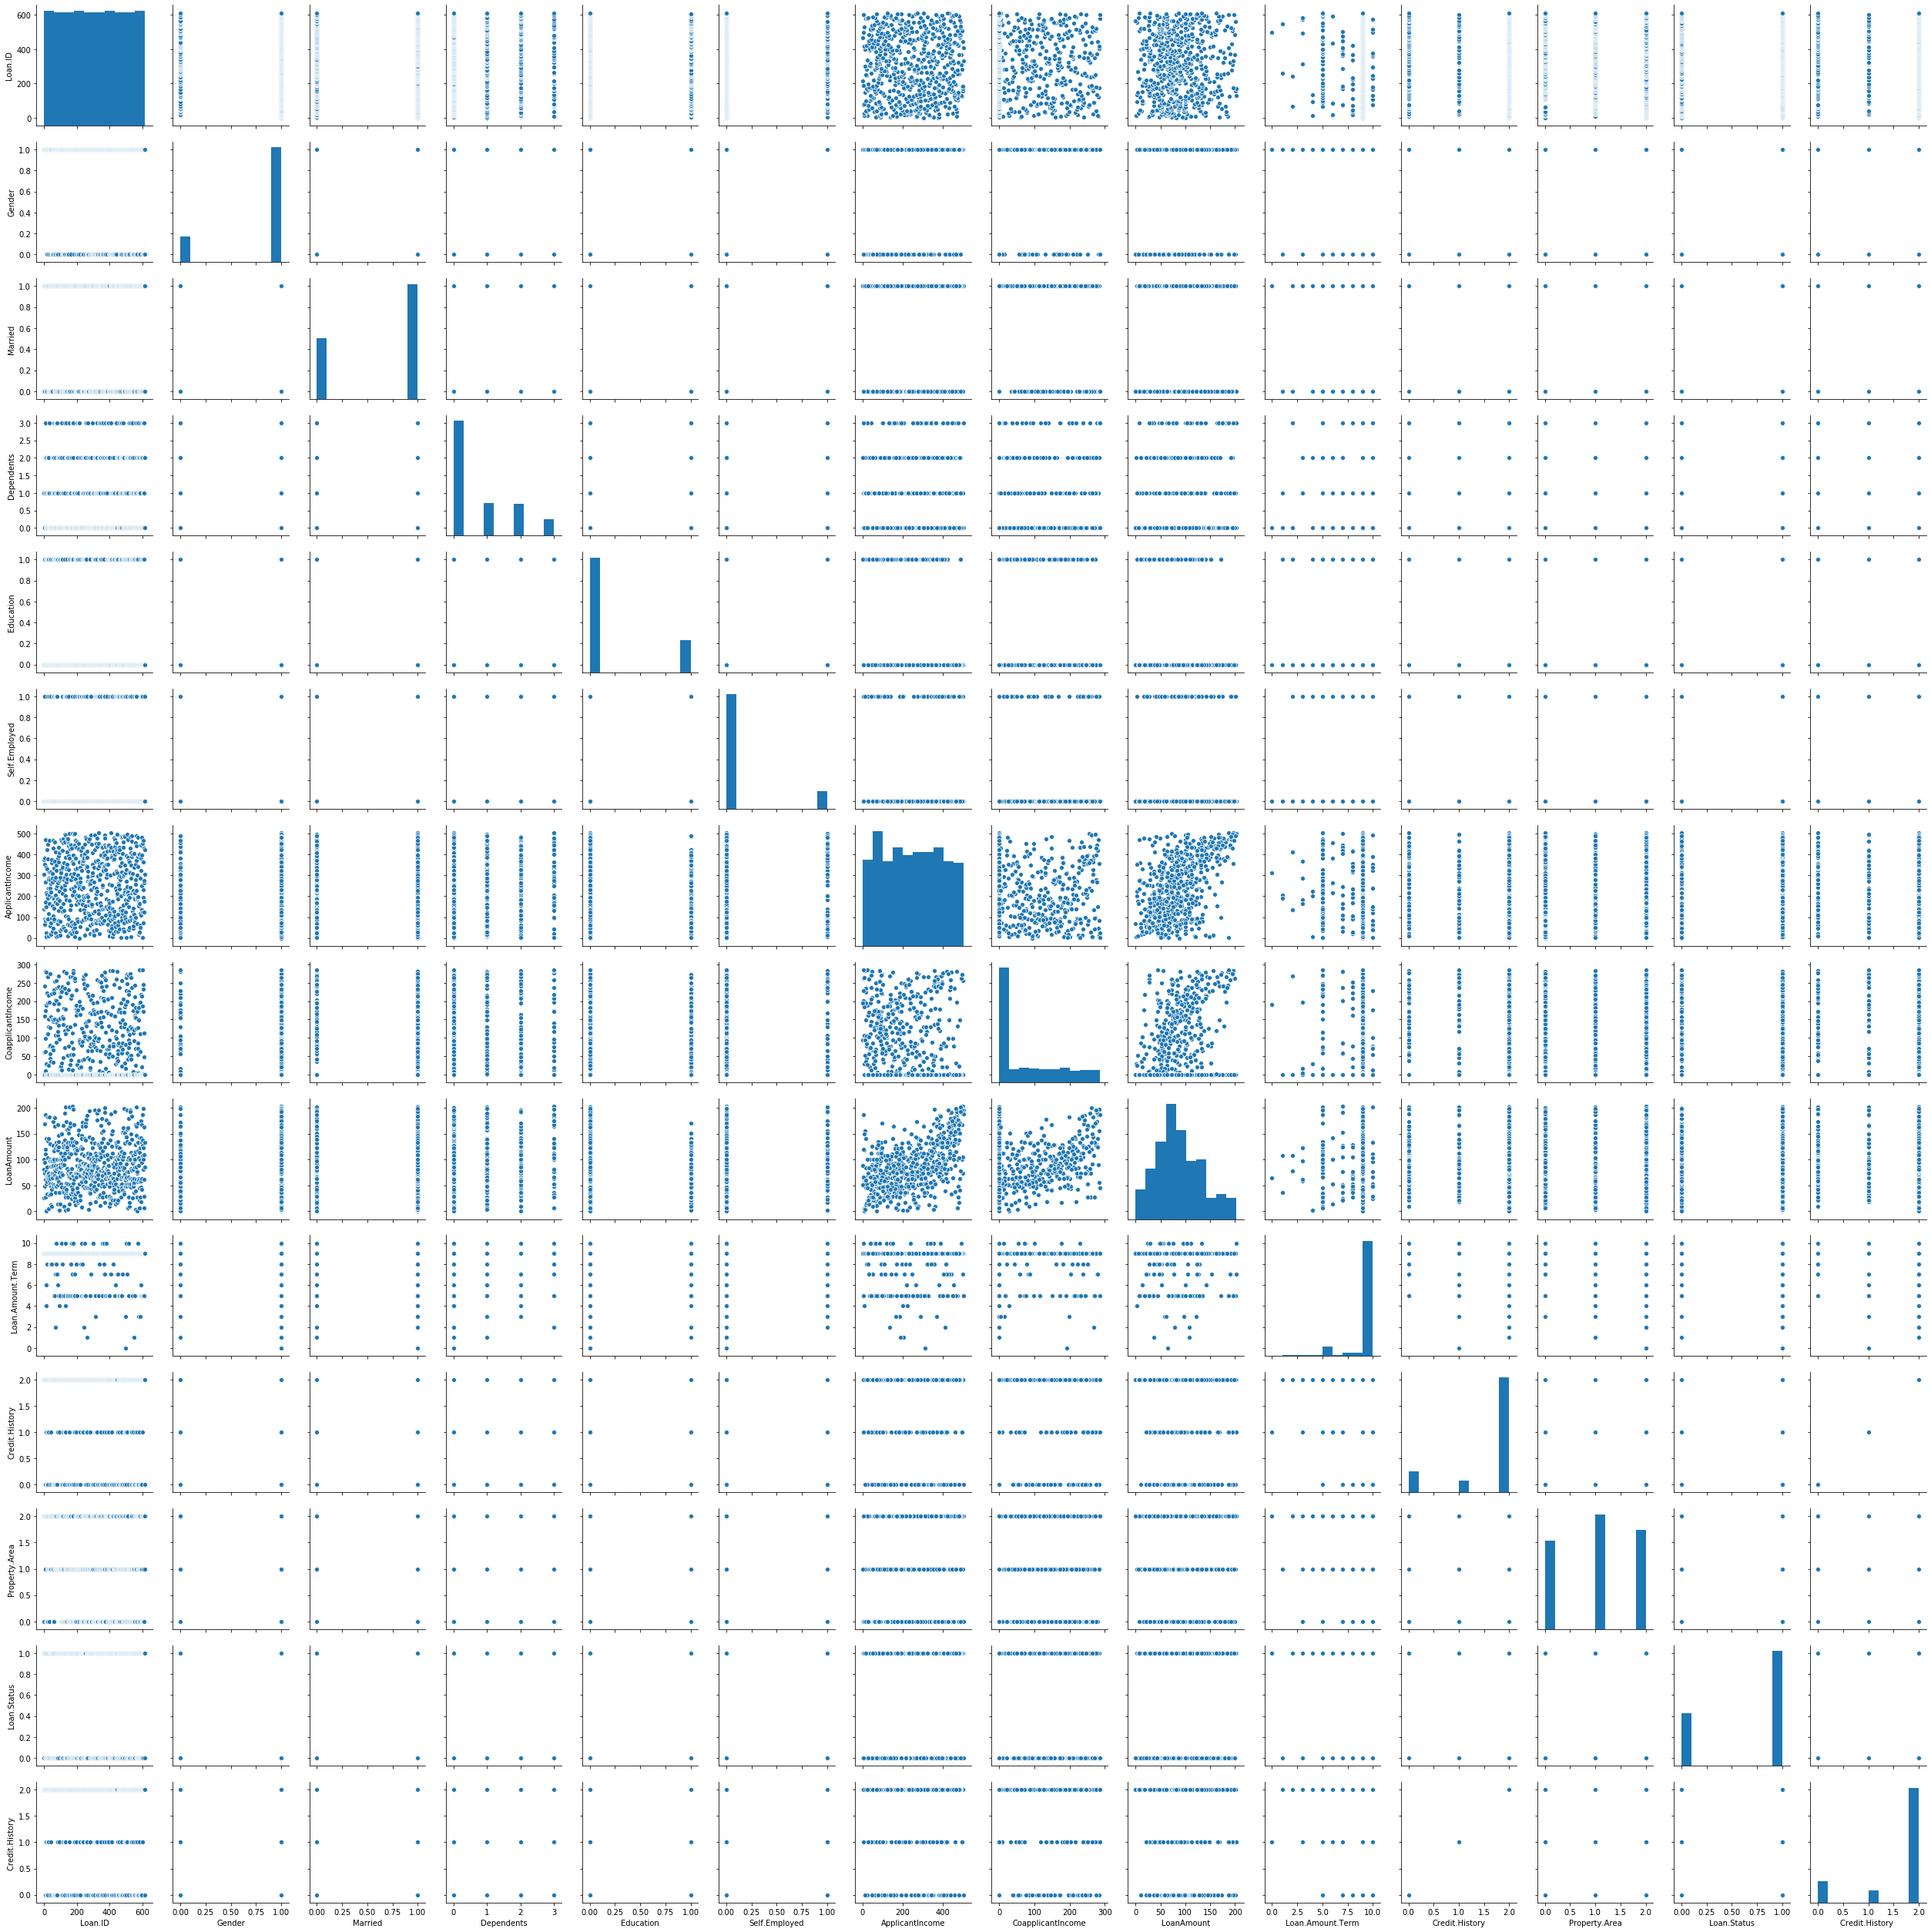

In [52]:
sns.pairplot(loan)
plt.show()

In [57]:
#counterr target variables
from collections import Counter
Counter(loan['Loan.Status'])

Counter({1: 422, 0: 192})

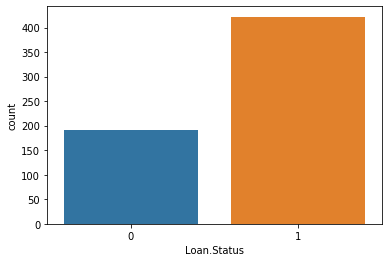

In [58]:
#plotting target variables
sns.countplot(x='Loan.Status',data=loan)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13A68510>,
      dtype=object)

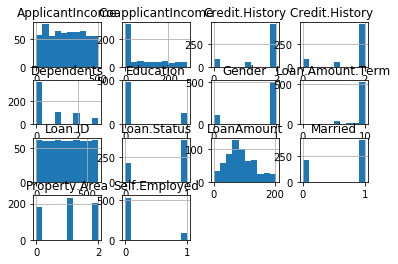

In [59]:
loan.hist()

In [60]:
from scipy.stats import skew
skew(loan)

array([ 0.        , -1.64476455, -0.6432738 ,  1.01306831,  1.36427864,
        2.15451624,  0.04089328,  0.77896139,  0.45759409, -2.90009378,
       -1.60279778, -0.06603432, -0.80801793, -1.60279778])

In [61]:
loan.columns

Index(['Loan.ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self.Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan.Amount.Term', 'Credit.History', 'Property.Area', 'Loan.Status',
       'Credit.History '],
      dtype='object')

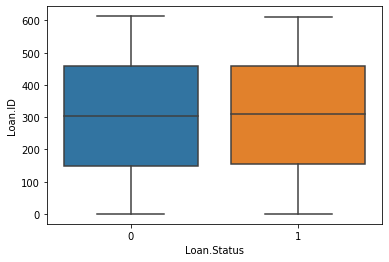

In [62]:
#checking outliers against target variable
sns.boxplot('Loan.Status', 'Loan.ID', data = loan)

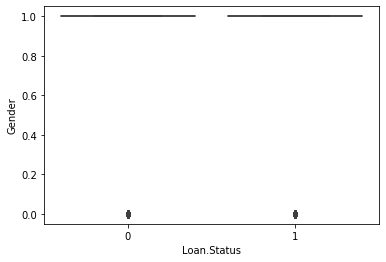

In [63]:
sns.boxplot('Loan.Status', 'Gender', data = loan)

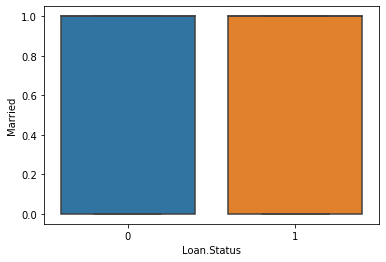

In [64]:
sns.boxplot('Loan.Status', 'Married', data = loan)

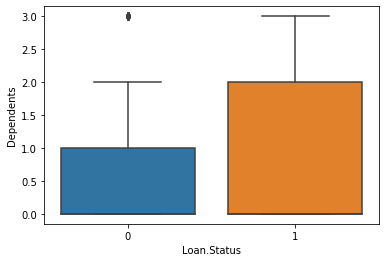

In [65]:
sns.boxplot('Loan.Status', 'Dependents', data = loan)

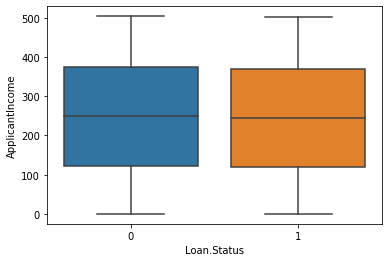

In [66]:
sns.boxplot('Loan.Status', 'ApplicantIncome', data = loan)

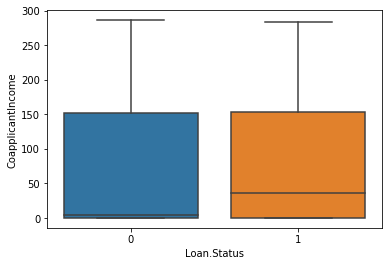

In [67]:
sns.boxplot('Loan.Status', 'CoapplicantIncome', data = loan)

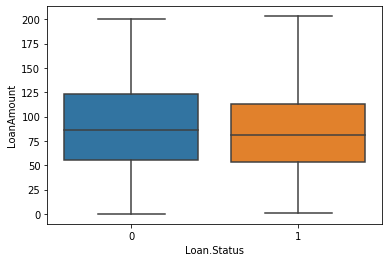

In [68]:
sns.boxplot('Loan.Status', 'LoanAmount', data = loan)

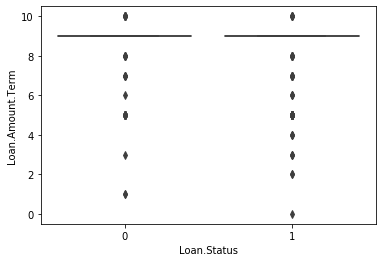

In [69]:
sns.boxplot('Loan.Status', 'Loan.Amount.Term', data = loan)

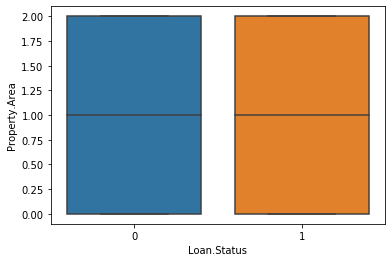

In [70]:
sns.boxplot('Loan.Status', 'Property.Area', data = loan)

In [7]:
#outlier treatment
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(loan))
z

array([[1.72923217, 0.47234264, 1.37208932, ..., 0.51330005, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.51330005, 1.31851281,
        1.48253724],
       [1.71794844, 0.47234264, 0.72881553, ..., 0.51330005, 1.22329839,
        0.67451931],
       ...,
       [1.71794844, 0.47234264, 0.72881553, ..., 0.51330005, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.51330005, 1.22329839,
        0.67451931],
       [1.72923217, 2.11710719, 1.37208932, ..., 2.251316  , 0.04760721,
        1.48253724]])

In [8]:
threshold=3
print(np.where(z>3))
df=loan[(z<3).all(axis=1)]
df

(array([ 14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585],
      dtype=int32), array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], dtype=int32))


,Loan.ID,Gender,Married,Dependents,Education,Self.Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan.Amount.Term,Credit.History,Property.Area,Loan.Status
0,0,1,0,0,0,0,376,0,100,9,2,2,1
1,1,1,1,1,0,0,306,60,81,9,2,0,0
2,2,1,1,0,0,1,139,0,26,9,2,2,1
3,3,1,1,0,1,0,90,160,73,9,2,2,1
4,4,1,0,0,0,0,381,0,94,9,2,2,1
5,5,1,1,2,0,1,353,241,169,9,2,2,1
6,6,1,1,0,1,0,65,61,48,9,2,2,1
7,7,1,1,3,0,0,146,174,111,9,0,1,0
8,8,1,1,2,0,0,269,63,120,9,2,2,1
9,9,1,1,1,0,0,470,282,186,9,2,1,0


In [9]:
loan.shape

(614, 13)

In [10]:
df.shape

(602, 13)

In [20]:
x=loan.drop('Loan.Status',axis=1)

In [21]:
y=loan['Loan.Status']

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [23]:
print(x.shape)
print(y.shape)

(614, 12)
(614,)


In [42]:
#splitting data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size = 0.4,random_state=10)

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(368, 12)
(246, 12)
(368,)
(246,)


In [44]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

80.48780487804879
[[ 30  41]
 [  7 168]]
              precision    recall  f1-score   support

           0       0.81      0.42      0.56        71
           1       0.80      0.96      0.88       175

    accuracy                           0.80       246
   macro avg       0.81      0.69      0.72       246
weighted avg       0.81      0.80      0.78       246



In [27]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb)*100)
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

78.45528455284553
[[ 31  40]
 [ 13 162]]
              precision    recall  f1-score   support

           0       0.70      0.44      0.54        71
           1       0.80      0.93      0.86       175

    accuracy                           0.78       246
   macro avg       0.75      0.68      0.70       246
weighted avg       0.77      0.78      0.77       246



In [28]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

72.35772357723577
[[ 43  28]
 [ 40 135]]
              precision    recall  f1-score   support

           0       0.52      0.61      0.56        71
           1       0.83      0.77      0.80       175

    accuracy                           0.72       246
   macro avg       0.67      0.69      0.68       246
weighted avg       0.74      0.72      0.73       246



In [29]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

79.26829268292683
[[ 25  46]
 [  5 170]]
              precision    recall  f1-score   support

           0       0.83      0.35      0.50        71
           1       0.79      0.97      0.87       175

    accuracy                           0.79       246
   macro avg       0.81      0.66      0.68       246
weighted avg       0.80      0.79      0.76       246



In [30]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[ 36  35]
 [ 18 157]]
78.45528455284553


In [31]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [32]:
svmkernel('rbf')

0.8008130081300813
[[ 25  46]
 [  3 172]]
              precision    recall  f1-score   support

           0       0.89      0.35      0.51        71
           1       0.79      0.98      0.88       175

    accuracy                           0.80       246
   macro avg       0.84      0.67      0.69       246
weighted avg       0.82      0.80      0.77       246



In [33]:
svmkernel('poly')

0.7967479674796748
[[ 26  45]
 [  5 170]]
              precision    recall  f1-score   support

           0       0.84      0.37      0.51        71
           1       0.79      0.97      0.87       175

    accuracy                           0.80       246
   macro avg       0.81      0.67      0.69       246
weighted avg       0.80      0.80      0.77       246



In [34]:
svmkernel('linear')

0.8008130081300813
[[ 28  43]
 [  6 169]]
              precision    recall  f1-score   support

           0       0.82      0.39      0.53        71
           1       0.80      0.97      0.87       175

    accuracy                           0.80       246
   macro avg       0.81      0.68      0.70       246
weighted avg       0.80      0.80      0.78       246



In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)

0.9184782608695652

In [85]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

80.48780487804879
[[ 30  41]
 [  7 168]]
              precision    recall  f1-score   support

           0       0.81      0.42      0.56        71
           1       0.80      0.96      0.88       175

    accuracy                           0.80       246
   macro avg       0.81      0.69      0.72       246
weighted avg       0.81      0.80      0.78       246



In [86]:
#roc-curve
from sklearn.metrics import roc_curve
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.80490113, 0.4384401 , 0.83233406, 0.86489384, 0.71342952,
       0.79143145, 0.26418854, 0.8466167 , 0.85141512, 0.80465647,
       0.73270512, 0.84279269, 0.89709138, 0.92970877, 0.11856694,
       0.55418432, 0.87788512, 0.86602986, 0.66410734, 0.67377742,
       0.84740252, 0.84149735, 0.79346536, 0.25990629, 0.84264136,
       0.80613472, 0.86687416, 0.79903629, 0.90476889, 0.84252402,
       0.76957314, 0.8024258 , 0.87423625, 0.13005144, 0.73686795,
       0.82157469, 0.8581546 , 0.86173229, 0.77585187, 0.53780235,
       0.78628382, 0.84549494, 0.6549344 , 0.71609143, 0.58725642,
       0.84355152, 0.82108044, 0.76080834, 0.78318567, 0.77780481,
       0.9055172 , 0.69533658, 0.77982951, 0.78371216, 0.14876724,
       0.86473614, 0.76614718, 0.15623884, 0.76701535, 0.92934381,
       0.58430531, 0.87247313, 0.83523635, 0.74169784, 0.86384646,
       0.75081339, 0.85039416, 0.85004393, 0.33063604, 0.74125521,
       0.89717192, 0.72540709, 0.78133005, 0.13106498, 0.75731

In [87]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [88]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.01408451 0.01408451 0.02816901
 0.02816901 0.04225352 0.04225352 0.05633803 0.05633803 0.07042254
 0.07042254 0.08450704 0.08450704 0.09859155 0.09859155 0.14084507
 0.14084507 0.16901408 0.16901408 0.21126761 0.21126761 0.22535211
 0.22535211 0.23943662 0.23943662 0.25352113 0.25352113 0.26760563
 0.26760563 0.29577465 0.29577465 0.30985915 0.30985915 0.32394366
 0.32394366 0.33802817 0.33802817 0.35211268 0.35211268 0.36619718
 0.36619718 0.38028169 0.38028169 0.4084507  0.4084507  0.42253521
 0.42253521 0.43661972 0.43661972 0.45070423 0.45070423 0.46478873
 0.46478873 0.47887324 0.47887324 0.49295775 0.49295775 0.50704225
 0.50704225 0.52112676 0.52112676 0.53521127 0.53521127 0.54929577
 0.54929577 0.56338028 0.56338028 0.57746479 0.57746479 0.6056338
 0.6056338  0.61971831 0.61971831 0.64788732 0.64788732 0.95774648
 0.95774648 1.        ]
[0.         0.00571429 0.01714286 0.01714286 0.05142857 0.05142857
 0.05714286 0.05714286 0.09142857 0.091

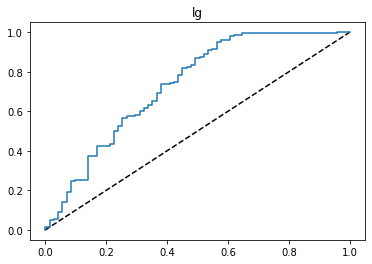

In [89]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="LogisticRegression")
plt.title("lg")
plt.show()

In [91]:
#saving the model as pickl
from sklearn.externals import joblib
joblib.dump(lg,"Project 19_loan.pkl")

['Project 19_loan.pkl']

In [92]:
#loading the model
lg_from_joblib=joblib.load("Project 19_loan.pkl")

In [93]:
#using the model to make prediction
lg_from_joblib.predict(x_test)

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1])